In [1]:
%pip install yellowbrick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
#import prince
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import scipy.stats as stats

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(r'C:\Users\paowm\Downloads\churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [3]:
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
#create a df with relevant fields, drop categorical columns 
df_=df[['Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
df_.head(5)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


In [5]:
#detecting nulls
nulls = df_.isnull().sum()
nulls

Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/1934793748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Children']=stats.zscore(df_['Children'])


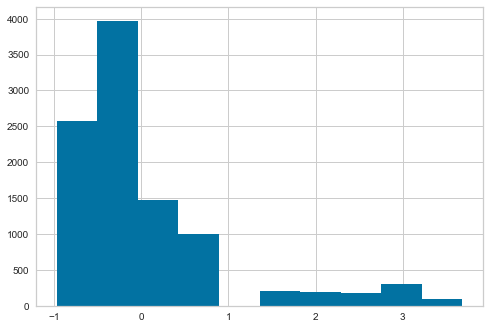

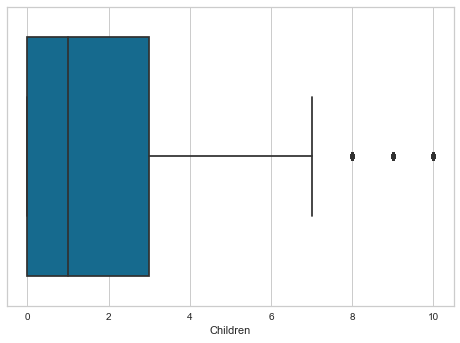

In [6]:
#detecting outliers in variable Children
df_['Z_Score_Children']=stats.zscore(df_['Children'])
df_[['Children','Z_Score_Children']].head
sum((df_.Z_Score_Children < -3) | (df_.Z_Score_Children > 3))
plt.hist(df_['Z_Score_Children'])
plt.show()
c =sns.boxplot(x='Children', data=df_)

In [7]:
df_[df_.Z_Score_Children >3]
df_['Children'] = np.where(df_['Children'] > 3, df_['Children'].median(), df_['Children'])

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2298974615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Children'] = np.where(df_['Children'] > 3, df_['Children'].median(), df_['Children'])


In [8]:
df_['Z_Score_Children']=stats.zscore(df_['Children'])
df_[df_.Z_Score_Children >3]

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/1935638223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Children']=stats.zscore(df_['Children'])


,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Z_Score_Children


C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2494456159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Age']=stats.zscore(df_['Age'])


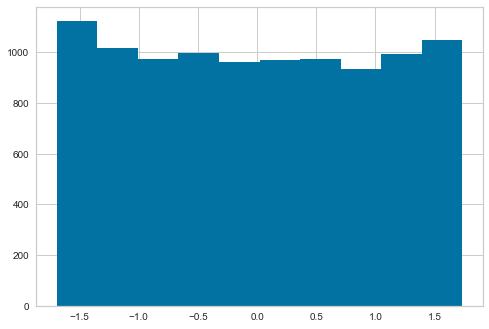

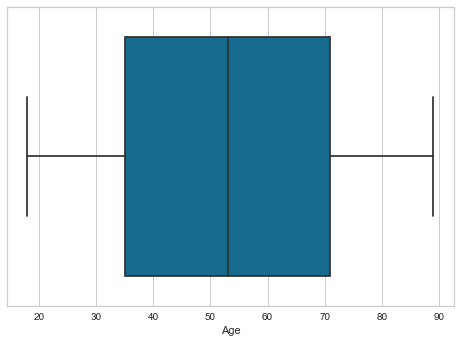

In [9]:
#detecting outliers in variable Age
df_['Z_Score_Age']=stats.zscore(df_['Age'])
df_[['Age','Z_Score_Age']].head
sum((df_.Z_Score_Age < -3) | (df_.Z_Score_Age > 3))
plt.hist(df_['Z_Score_Age'])
plt.show()
c =sns.boxplot(x='Age', data=df_)

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/312092040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Income']=stats.zscore(df_['Income'])


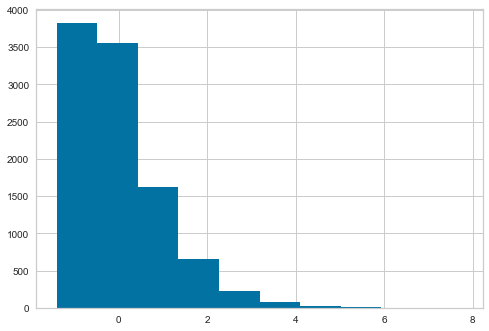

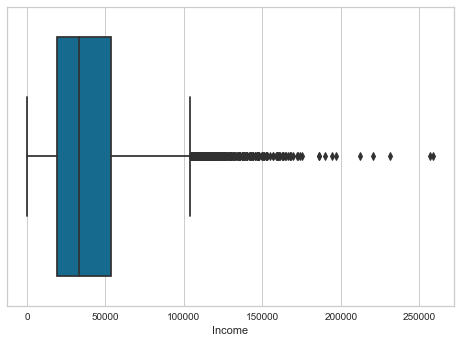

In [10]:
#detecting outliers in variable Income
df_['Z_Score_Income']=stats.zscore(df_['Income'])
df_[['Income','Z_Score_Income']].head
sum((df_.Z_Score_Income < -3) | (df_.Z_Score_Income > 3))
plt.hist(df_['Z_Score_Income'])
plt.show()
c =sns.boxplot(x='Income', data=df_)

In [11]:
#treat outliers in variable Income
df_[df_.Z_Score_Income >3]
df_['Income'] = np.where(df_['Z_Score_Income'] > 3, df_['Income'].median(), df_['Income'])

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2311030962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Income'] = np.where(df_['Z_Score_Income'] > 3, df_['Income'].median(), df_['Income'])


C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/3945795895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Outage_sec_perweek']=stats.zscore(df_['Outage_sec_perweek'])


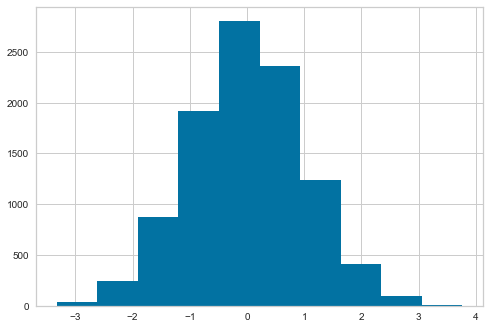

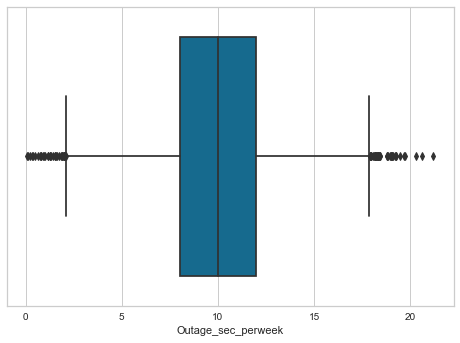

In [12]:
#detecting outliers in variable Outag_sec_perweek
df_['Z_Score_Outage_sec_perweek']=stats.zscore(df_['Outage_sec_perweek'])
df_[['Outage_sec_perweek','Z_Score_Outage_sec_perweek']].head
sum((df_.Z_Score_Outage_sec_perweek < -3) | (df_.Z_Score_Outage_sec_perweek > 3))
plt.hist(df_['Z_Score_Outage_sec_perweek'])
plt.show()
c =sns.boxplot(x='Outage_sec_perweek', data=df_)

In [13]:
#treat outliers in variable Outage_sec_perwwek
df_[df_.Z_Score_Outage_sec_perweek >3]
df_['Outage_sec_perweek'] = np.where(df_['Z_Score_Outage_sec_perweek'] > 3, df_['Outage_sec_perweek'].mean(), df_['Outage_sec_perweek'])

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2458926228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Outage_sec_perweek'] = np.where(df_['Z_Score_Outage_sec_perweek'] > 3, df_['Outage_sec_perweek'].mean(), df_['Outage_sec_perweek'])


C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/1648958477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Email']=stats.zscore(df_['Email'])


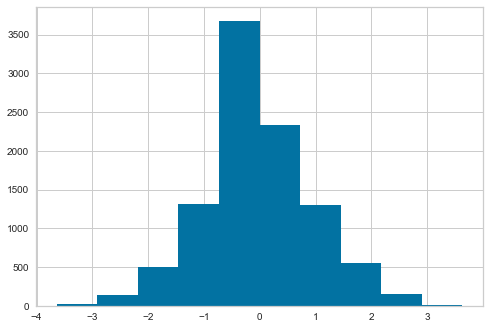

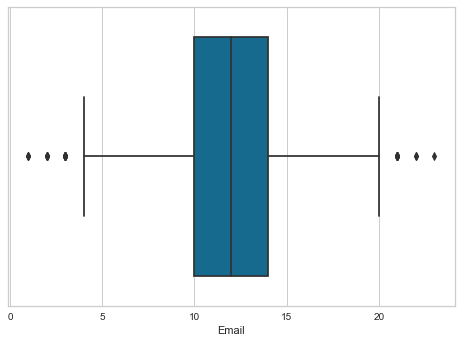

In [14]:
#detecting outliers in variable Email
df_['Z_Score_Email']=stats.zscore(df_['Email'])
df_[['Email','Z_Score_Email']].head
sum((df_.Z_Score_Email < -3) | (df_.Z_Score_Email > 3))
plt.hist(df_['Z_Score_Email'])
plt.show()
c =sns.boxplot(x='Email', data=df_)

In [15]:
#treat outliers in variable Email
a = df_['Z_Score_Email']
df_['Email'] = np.where(a < -3, df_['Email'].median(), df_['Email'])
df_['Email'] = np.where(a > 3, df_['Email'].median(), df_['Email'])
df_['Z_Score_Email']=stats.zscore(df_['Email'])

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2620892609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Email'] = np.where(a < -3, df_['Email'].median(), df_['Email'])
C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2620892609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Email'] = np.where(a > 3, df_['Email'].median(), df_['Email'])
C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2620892609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2739420956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Contacts']=stats.zscore(df_['Contacts'])


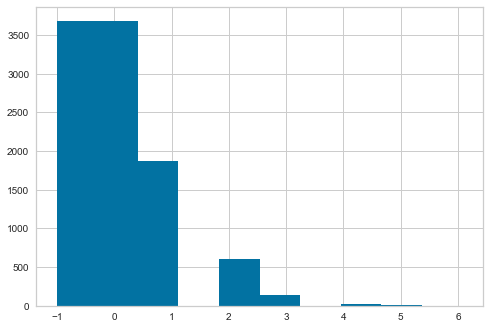

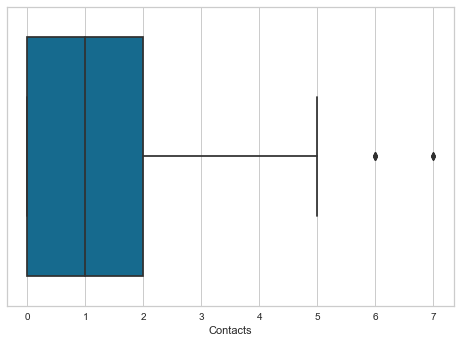

In [16]:
#detecting outliers in variable Contacts
df_['Z_Score_Contacts']=stats.zscore(df_['Contacts'])
df_[['Contacts','Z_Score_Contacts']].head
sum(df_.Z_Score_Contacts > 3)
plt.hist(df_['Z_Score_Contacts'])
plt.show()
c =sns.boxplot(x='Contacts', data=df_)

In [17]:
#treating outliers in variables Contacts
df_[df_.Z_Score_Contacts >3]
df_['Contacts'] = np.where(df_['Z_Score_Contacts'] > 3, df_['Contacts'].median(), df_['Contacts'])

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/1607624430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Contacts'] = np.where(df_['Z_Score_Contacts'] > 3, df_['Contacts'].median(), df_['Contacts'])


C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2028320266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Yearly_equip_failure']=stats.zscore(df_['Yearly_equip_failure'])


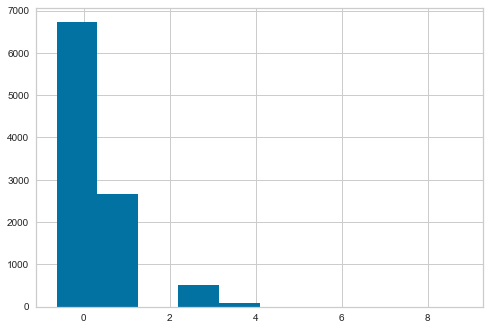

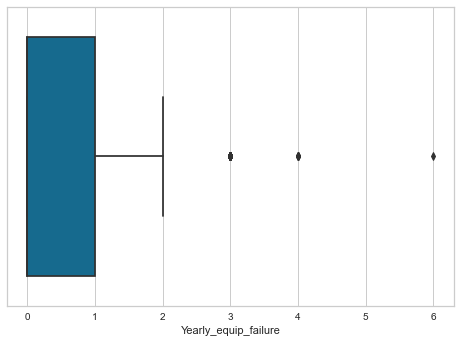

In [18]:
#detecting outliers in variable Yearly_equip_failure
df_['Z_Score_Yearly_equip_failure']=stats.zscore(df_['Yearly_equip_failure'])
df_[['Yearly_equip_failure','Z_Score_Yearly_equip_failure']].head
sum((df_.Z_Score_Yearly_equip_failure < -3) | (df_.Z_Score_Yearly_equip_failure > 3))
plt.hist(df_['Z_Score_Yearly_equip_failure'])
plt.show()
c =sns.boxplot(x='Yearly_equip_failure', data=df_)

In [19]:
#treat outliers of variable Yearly_equip_failure
df_[df_.Z_Score_Yearly_equip_failure >3]
df_['Yearly_equip_failure'] = np.where(df_['Z_Score_Yearly_equip_failure'] > 3, df_['Yearly_equip_failure'].median(), df_['Yearly_equip_failure'])

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/3329096299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Yearly_equip_failure'] = np.where(df_['Z_Score_Yearly_equip_failure'] > 3, df_['Yearly_equip_failure'].median(), df_['Yearly_equip_failure'])


C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/3168897616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Tenure']=stats.zscore(df_['Tenure'])


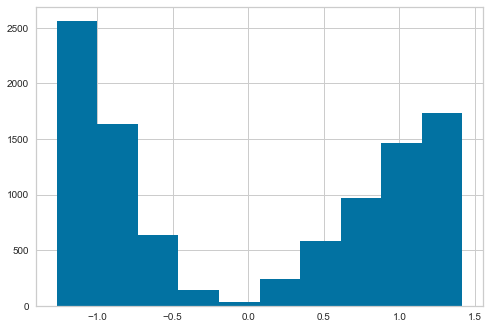

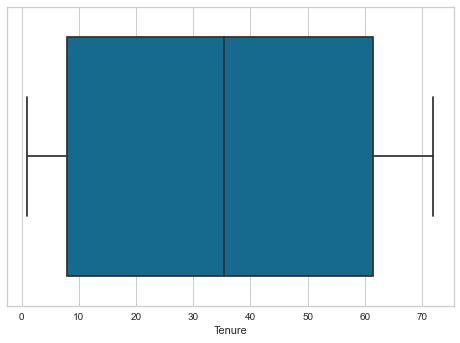

In [20]:
#detecting outliers in variable Tenure
df_['Z_Score_Tenure']=stats.zscore(df_['Tenure'])
df_[['Tenure','Z_Score_Tenure']].head
sum((df_.Z_Score_Tenure < -3) | (df_.Z_Score_Tenure > 3))
plt.hist(df_['Z_Score_Tenure'])
plt.show()
c =sns.boxplot(x='Tenure', data=df_)

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2839763331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_MonthlyCharge']=stats.zscore(df_['MonthlyCharge'])


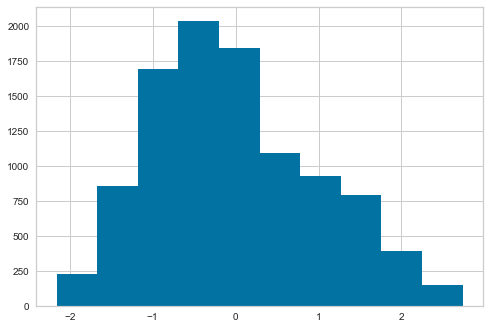

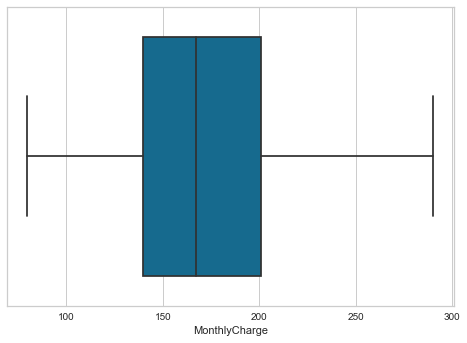

In [21]:
#detecting outliers in variable MonthlyCharge
df_['Z_Score_MonthlyCharge']=stats.zscore(df_['MonthlyCharge'])
df_[['MonthlyCharge','Z_Score_MonthlyCharge']].head
sum((df_.Z_Score_MonthlyCharge < -3) | (df_.Z_Score_MonthlyCharge > 3))
plt.hist(df_['Z_Score_MonthlyCharge'])
plt.show()
c =sns.boxplot(x='MonthlyCharge', data=df_)

C:\Users\paowm\AppData\Local\Temp/ipykernel_28264/2157609539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Z_Score_Bandwidth_GB_Year']=stats.zscore(df_['Bandwidth_GB_Year'])


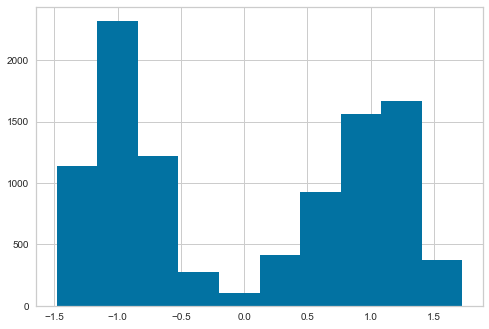

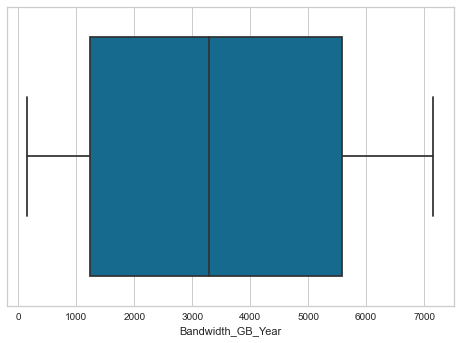

In [22]:
#detecting outliers in variable Bandwidth_GB_Year
df_['Z_Score_Bandwidth_GB_Year']=stats.zscore(df_['Bandwidth_GB_Year'])
df_[['Bandwidth_GB_Year','Z_Score_Bandwidth_GB_Year']].head
plt.hist(df_['Z_Score_Bandwidth_GB_Year'])
plt.show()
c =sns.boxplot(x='Bandwidth_GB_Year', data=df_)

In [23]:
df_.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Z_Score_Children,Z_Score_Age,Z_Score_Income,Z_Score_Outage_sec_perweek,Z_Score_Email,Z_Score_Contacts,Z_Score_Yearly_equip_failure,Z_Score_Tenure,Z_Score_MonthlyCharge,Z_Score_Bandwidth_GB_Year
0,0.0,68,28561.99,7.978323,10.0,0.0,1.0,6.795513,172.455519,904.536110,-1.211142,0.720925,-0.398778,-0.679978,-0.673076,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,1.0,27,21704.77,11.699080,12.0,0.0,1.0,1.156681,242.632554,800.982766,-0.190717,-1.259957,-0.641954,0.570331,-0.007389,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,1.0,50,9609.57,10.752800,9.0,0.0,1.0,15.754144,159.947583,2054.706961,-0.190717,-0.148730,-1.070885,0.252347,-1.005920,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,1.0,48,18925.23,14.913540,15.0,2.0,0.0,17.087227,119.956840,2164.579412,-0.190717,-0.245359,-0.740525,1.650506,0.991141,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,0.0,83,40074.19,8.147417,16.0,2.0,1.0,1.670972,149.948316,271.493436,-1.211142,1.445638,0.009478,-0.623156,1.323985,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [24]:
df_ = df_[['Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
df_.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0.0,68,28561.99,7.978323,10.0,0.0,1.0,6.795513,172.455519,904.536110
1,1.0,27,21704.77,11.699080,12.0,0.0,1.0,1.156681,242.632554,800.982766
2,1.0,50,9609.57,10.752800,9.0,0.0,1.0,15.754144,159.947583,2054.706961
3,1.0,48,18925.23,14.913540,15.0,2.0,0.0,17.087227,119.956840,2164.579412
4,0.0,83,40074.19,8.147417,16.0,2.0,1.0,1.670972,149.948316,271.493436


In [25]:
df_.to_csv(r'C:\Users\paowm\Downloads\churn_clean_data.csv')

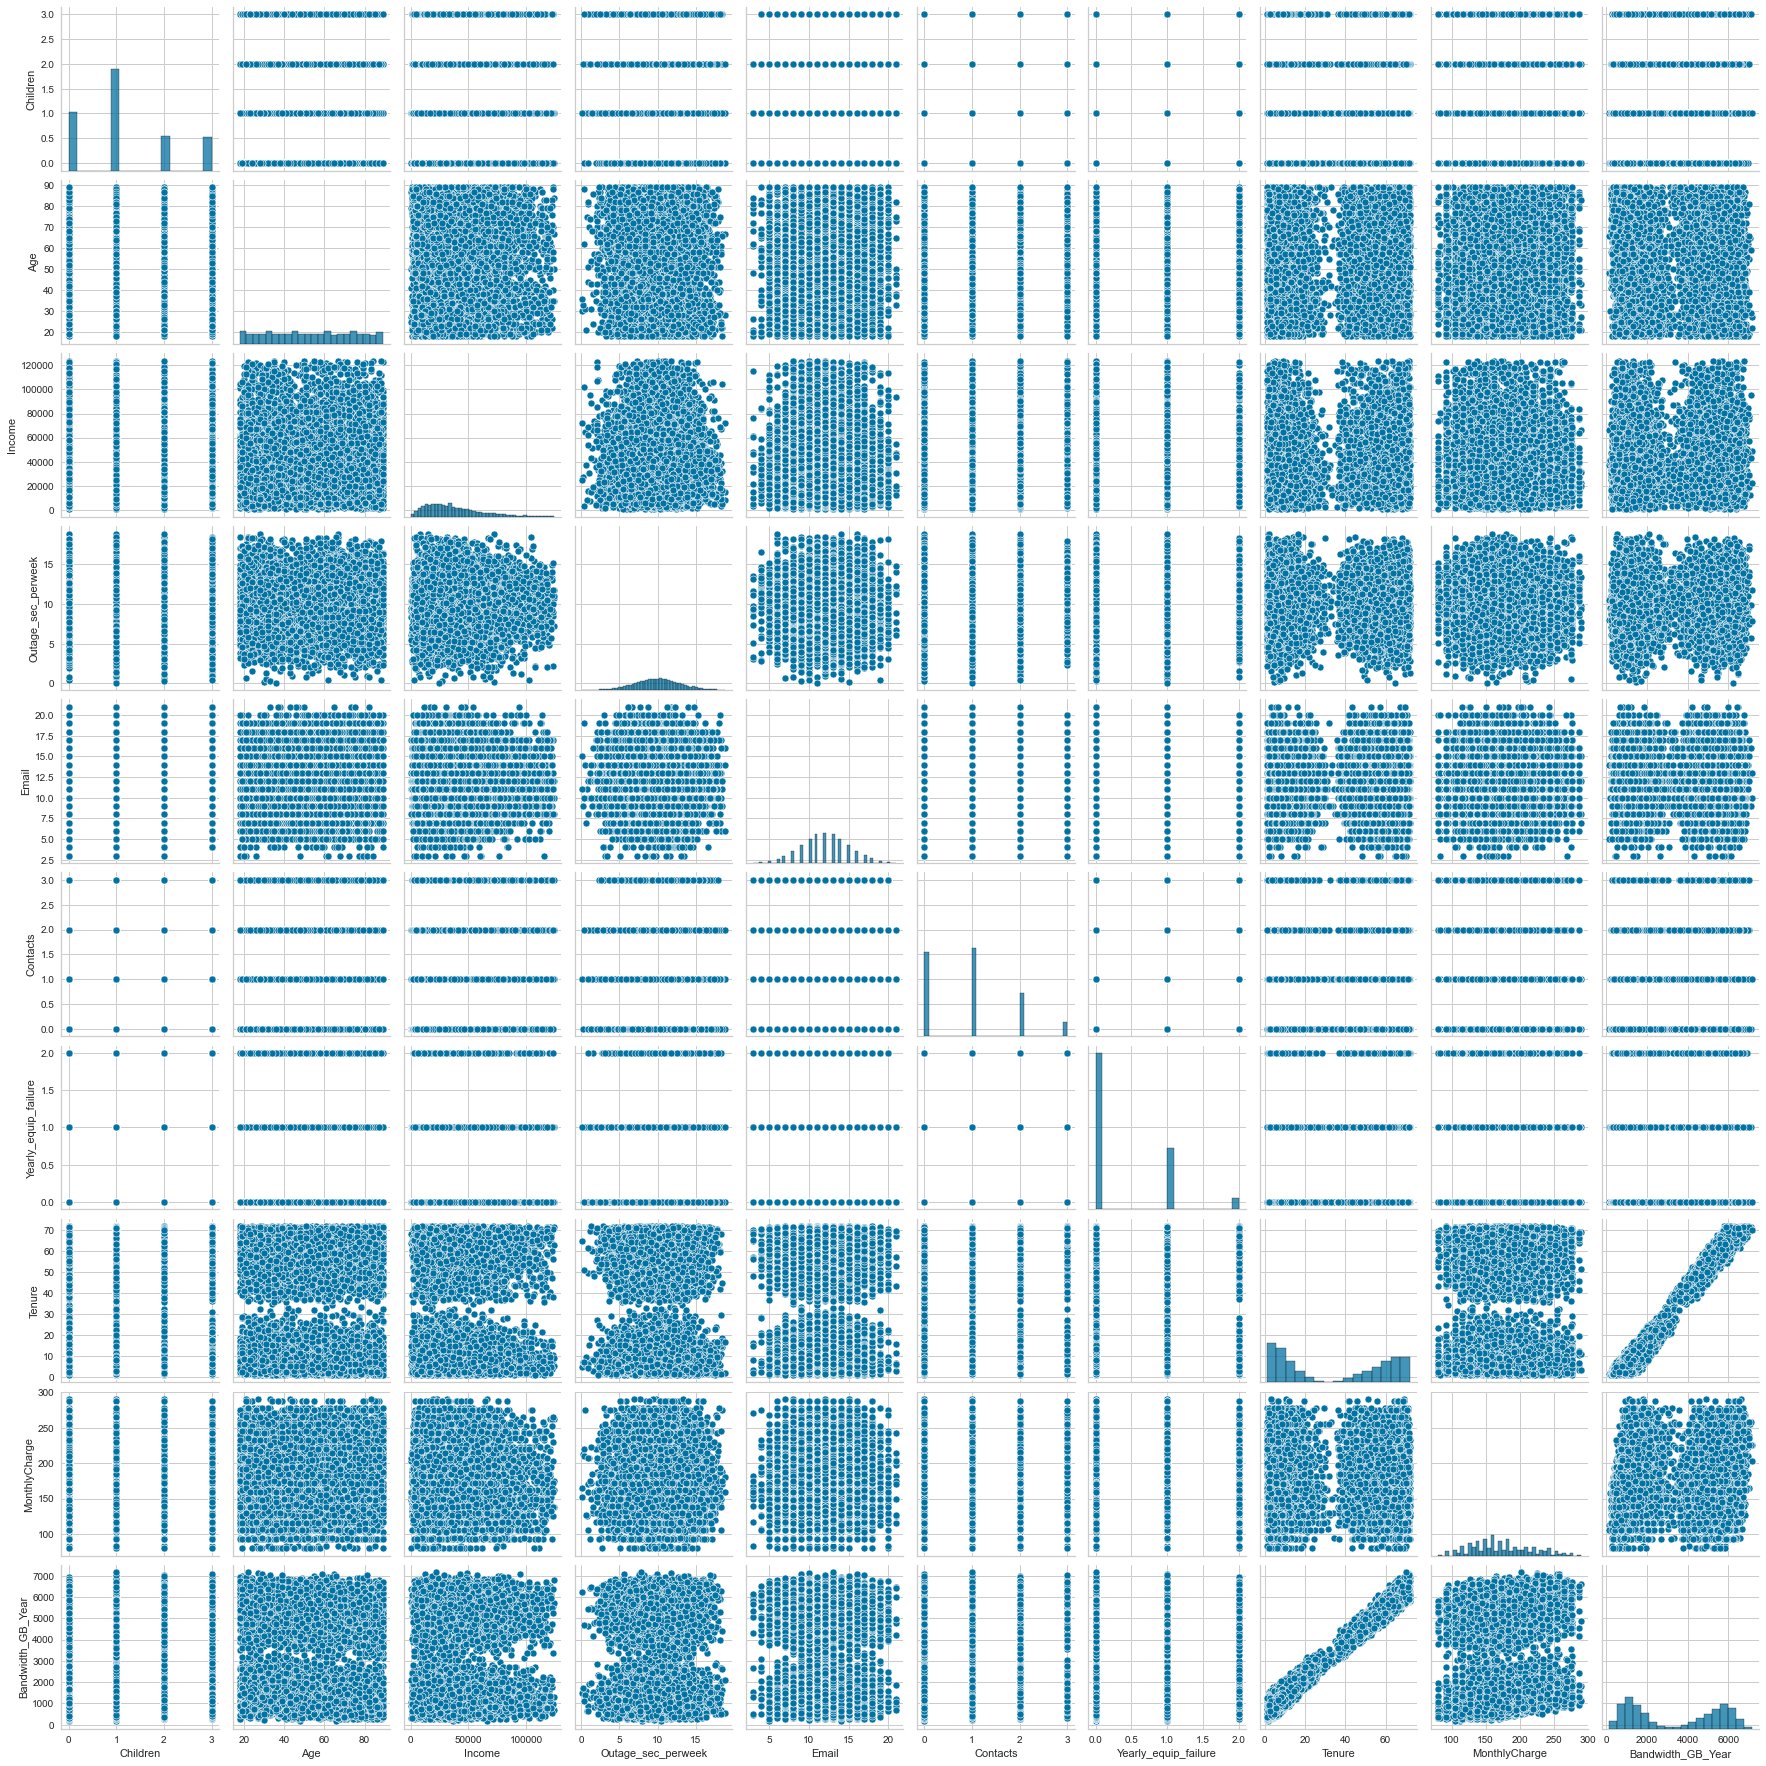

In [26]:
sns.pairplot(df_[['Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']])

In [27]:
sc = StandardScaler()
sc.fit(df_)
normalize_df_array = sc.transform(df_)
normalize_df = pd.DataFrame(normalize_df_array, columns = df_.columns)
normalize_df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-1.211142,0.720925,-0.385889,-0.680461,-0.673076,-1.055218,1.091221,-1.048746,-0.003943,-1.138487
1,-0.190717,-1.259957,-0.661838,0.579639,-0.007389,-1.055218,1.091221,-1.262001,1.630326,-1.185876
2,-0.190717,-0.148730,-1.148575,0.259165,-1.005920,-1.055218,1.091221,-0.709940,-0.295225,-0.612138
3,-0.190717,-0.245359,-0.773693,1.668274,0.991141,1.188018,-0.637583,-0.659524,-1.226521,-0.561857
4,-1.211142,1.445638,0.077387,-0.623195,1.323985,1.188018,1.091221,-1.242551,-0.528086,-1.428184


C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

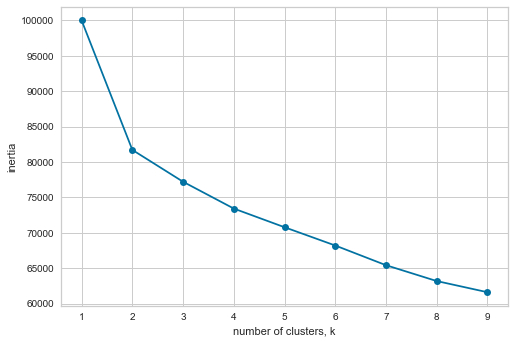

In [28]:
ks = range(1, 10)
inertias = []


for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(normalize_df)
    inertias.append(model.inertia_)


#plot
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

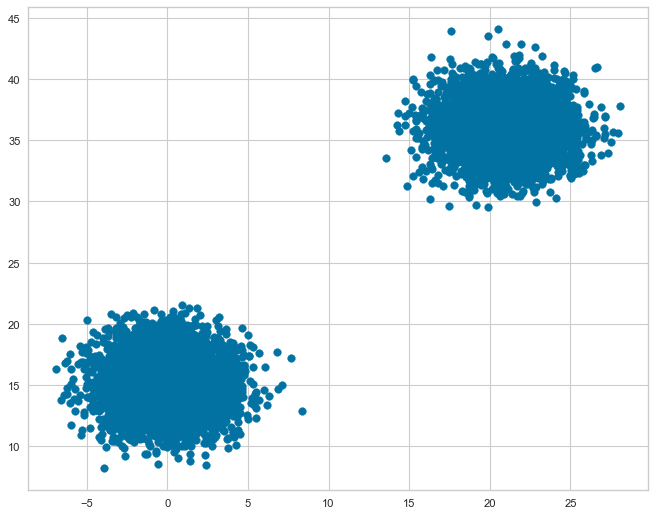

C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


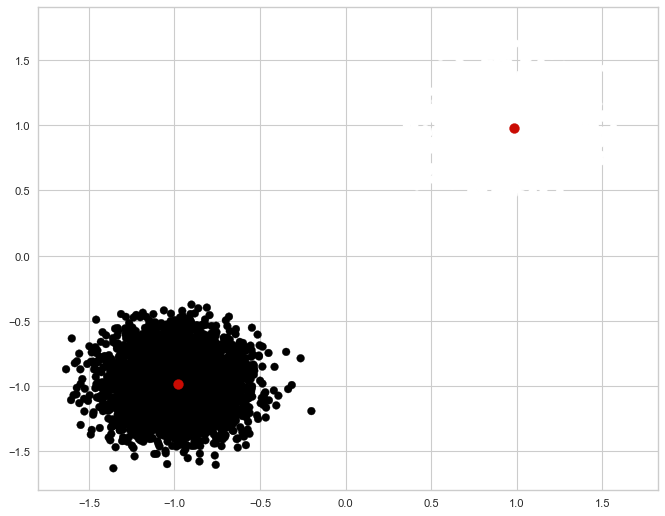

In [29]:
from sklearn.datasets import make_blobs
plt.figure(figsize=(10, 8), dpi=80)
features, clusters = make_blobs(n_samples = 10000,
                                center_box=(0,50),
                                n_features = 2,
                                cluster_std=2,
                                centers = 2,
                                shuffle = True,
                               random_state = 1)
plt.scatter(features[:,0], features[:,1])
plt.show()
df1 = pd.DataFrame(features, columns=['Children', 'Age'])
sc = StandardScaler()
sc.fit(df1)
scaled_data_array = sc.transform(df1)
scaled_data = pd.DataFrame(scaled_data_array, columns = df1.columns)

model = KMeans(n_clusters=2)
model.fit(scaled_data)
scaled_data['label'] = model.labels_
centroids = model.cluster_centers_
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(scaled_data['Children'], scaled_data['Age'], c= model.labels_)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'r')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 2).fit(df_)
kmeans.cluster_centers_

C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[1.18599311e+00, 5.31740815e+01, 2.46397957e+04, 1.00135209e+01,
        1.20469288e+01, 9.36280138e-01, 3.64810563e-01, 3.45484773e+01,
        1.72503545e+02, 3.39031515e+03],
       [1.18898417e+00, 5.28585092e+01, 6.92023350e+04, 9.92787093e+00,
        1.19653694e+01, 9.51187335e-01, 3.77968338e-01, 3.44749642e+01,
        1.72903515e+02, 3.39699852e+03]])

C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paowm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

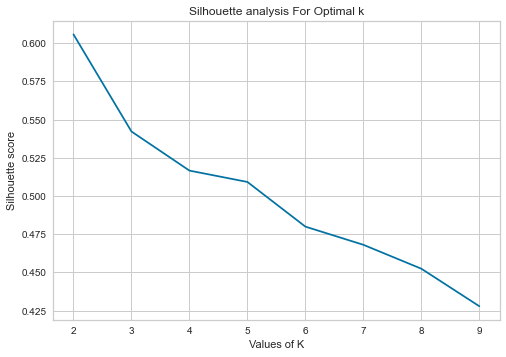

In [31]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df_, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'x-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()